<a href="https://colab.research.google.com/github/desunny/example/blob/desunny-steel/(forS)Lec05_%EC%84%A0%ED%98%95%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 선형 회귀
  - 농어의 무게를 예측하는 문제
  - 독립변수: 길이
  - 종속변수: 무게 

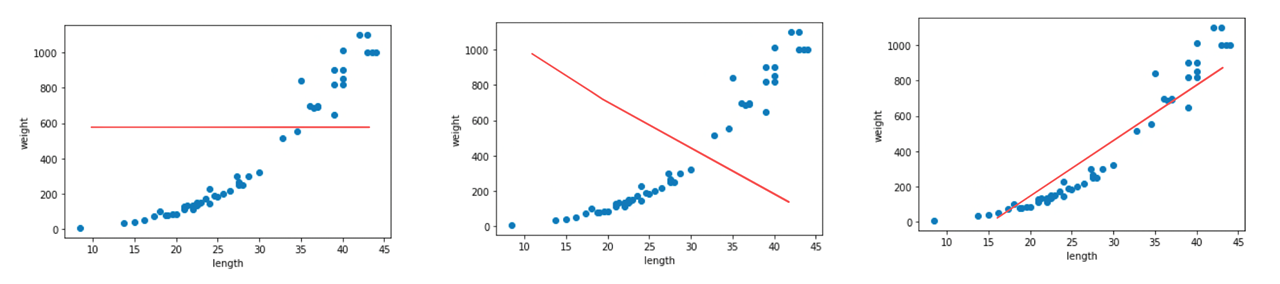

## k-최근접 이웃의 한계
 - 학습에 사용한 데이터의 범위를 벗어나는 데이터가 입력이 될 경우에 예측의 범위가 크게 벗어나는 문제가 있음 
 - 입력된 데이터에 가장 가까운 거리에 있는 값의 평균을 이용하여 예측하기 때문임

In [ ]:
import numpy as np

perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

In [ ]:
from sklearn.model_selection import train_test_split

# 훈련 세트와 테스트 세트로 나눕니다
train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state=42)
# 훈련 세트와 테스트 세트를 2차원 배열로 바꿉니다
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors=3)
# k-최근접 이웃 회귀 모델을 훈련합니다
knr.fit(train_input, train_target)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [ ]:
print(knr.predict([[50]]))

[1033.33333333]


In [ ]:
import matplotlib.pyplot as plt

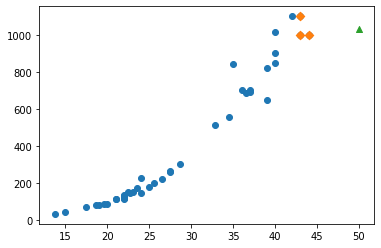

In [ ]:
# 50cm 농어의 이웃을 구합니다
distances, indexes = knr.kneighbors([[50]])

# 훈련 세트의 산점도를 그립니다
plt.scatter(train_input, train_target)
# 훈련 세트 중에서 이웃 샘플만 다시 그립니다
plt.scatter(train_input[indexes], train_target[indexes], marker='D')
# 50cm 농어 데이터
plt.scatter(50, 1033, marker='^')
plt.show()

In [ ]:
# 50CM 농어의 이웃의 무게 평균 
print(np.mean(train_target[indexes]))

1033.3333333333333


In [ ]:
# 100CM 농어인 경우에도 무게 평균은 50CM와 동일. 
print(knr.predict([[100]]))

[1033.33333333]


###  1.실습 문제 
 * 100CM 농어의 이웃을 구하여 스캐터 차트로 시각화를 하세요. 

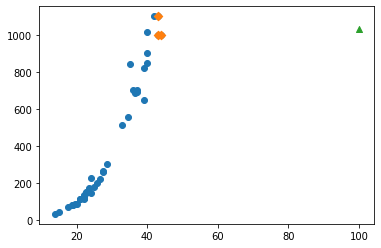

In [ ]:
# 100cm 농어의 이웃을 구합니다

# 훈련 세트의 산점도를 그립니다

# 훈련 세트 중에서 이웃 샘플만 다시 그립니다

# 100cm 농어 데이터와 이웃의 농어무게 평균값을 입력하여 스캐터 차트에 표시


# 챠트를 화면에 보여줍니다.


## 선형 회귀 (Linear Regression)
 - 농어의 길이와 무게를 가장 잘 표현하는 선을 찾는 것



  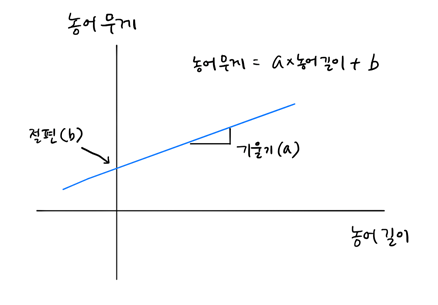

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()
# 선형 회귀 모델 훈련
lr.fit(train_input, train_target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# 50cm 농어에 대한 예측
print(lr.predict([[50]]))

[1241.83860323]


In [ ]:
print(lr.coef_, lr.intercept_) #coef_ 계수 , intercept_ 절편 

[39.01714496] -709.0186449535477


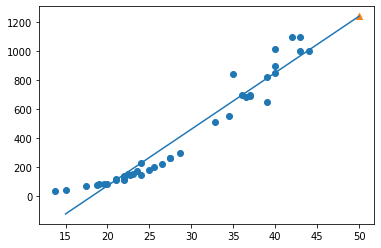

In [ ]:
# 훈련 세트의 산점도를 그립니다
plt.scatter(train_input, train_target)
# 15에서 50까지 1차 방정식 그래프를 그립니다
plt.plot([15, 50], [15*lr.coef_+lr.intercept_, 50*lr.coef_+lr.intercept_])
# 50cm 농어 데이터
plt.scatter(50, 1241.8, marker='^')
plt.show()

In [ ]:
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.9398463339976039
0.8247503123313558


### 2.실습문제
 * 100CM 농어의 무게를 예측하고 시각화 챠트로 그려보세요. 

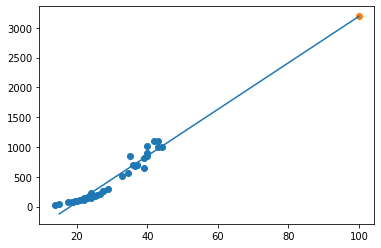

In [ ]:
# 선형 회귀 모델을 만들고 훈련(학습) 시킵니다.

# 100cm 농어의 무게를 예측합니다. 

# 훈련 세트의 산점도를 그립니다. 

#15에서 100까지 1차 방정식 선을 그립니다

# 100cm 농어 데이터를 표시합니다. 

# 챠트를 화면에 보여줍니다.


## 다항 회귀
  - 농어의 무게가 0g 이하로 내려갈까? 
  - 수입이 줄어들면 지출이 0원 이하로 내려갈까?
   
  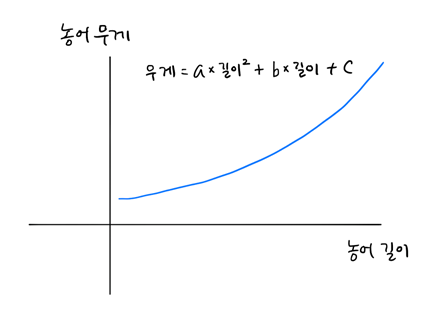

In [ ]:
#다항식 데이터로 만들기 (y=ax**2 + bx + c) 
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))

In [ ]:
print(train_poly.shape, test_poly.shape)
print('---')
print(train_poly[:5])

(42, 2) (14, 2)
---
[[ 384.16   19.6 ]
 [ 484.     22.  ]
 [ 349.69   18.7 ]
 [ 302.76   17.4 ]
 [1296.     36.  ]]


In [ ]:
lr = LinearRegression()
lr.fit(train_poly, train_target) #학습 - fit 

print(lr.predict([[50**2, 50]])) #50cm 농어의 무게 예측 - predict 

[1573.98423528]


In [ ]:
#print(lr.coef_, lr.intercept_)
print(lr.coef_[0], lr.coef_[1])

1.0143321093767301 -21.557924978837352


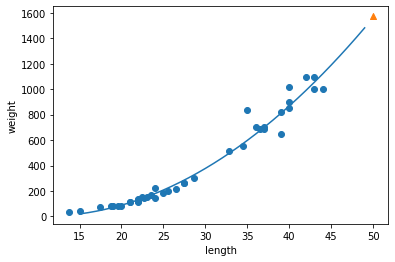

In [ ]:
# 구간별 직선을 그리기 위해 15에서 49까지 정수 배열을 만듭니다
point = np.arange(15, 50)
# 훈련 세트의 산점도를 그립니다
plt.scatter(train_input, train_target)
# 15에서 49까지 2차 방정식 그래프를 그립니다
plt.plot(point, 1.01*point**2 - 21.6*point + 116.05) #1.01 - 계수(기울기), 21.6 - 계수(기울기), 116.05 - 절편 
#plt.plot(point, lr.coef_[0]*point**2 + lr.coef_[1]*point + lr.intercept_)
# 50cm 농어 데이터
plt.scatter([50], [1574], marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9706807451768623
0.9775935108325122


### 3.실습문제
 * 100CM 농어의 무게를 예측하고 시각화 챠트로 그려보세요. 

* lr.coef_ value is [  1.01433211 -21.55792498] and lr.intercept_ value is 116.05021078278276
* wof00 value is [8103.57880667]


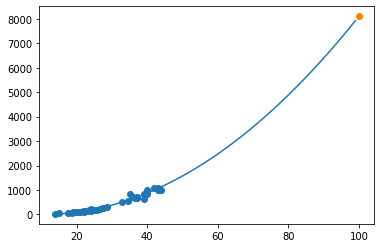

In [ ]:
# 다항 회귀 모델을 만들고 훈련(학습) 시킵니다.

# 모델의 기울기와 절편을 출력합니다. 

# 100cm 농어의 무게를 예측하여 wof100 변수에 저장합니다. wof100 변수의 값을 화면에 뿌립니다. 

# 훈련 세트의 산점도를 그립니다. 

#15에서 100까지 2차 방정식 선을 그립니다

# 100cm 농어 데이터를 표시합니다. 

# 챠트를 화면에 보여줍니다.


## 다중회귀
  - 여러개의 특성을 사용한 선형회귀 (길이, 높이, 두께 => 무게)
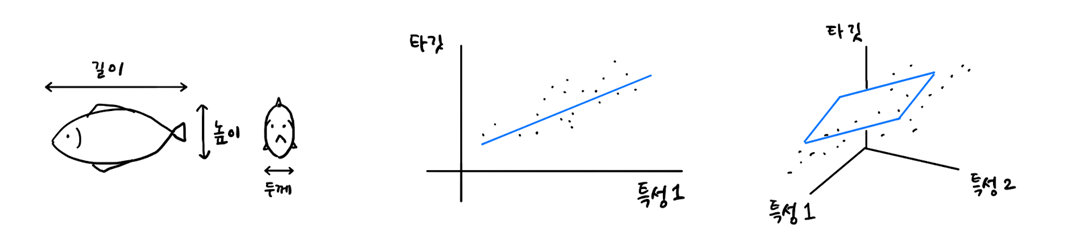

### 특성공학 (Feature Engineering)
  - 기존의 특성을 사용하여 새로운 특성을 만들어내는 작업

In [ ]:
# 데이터 준비 
# 판다스(Pandas)를 이용하여 데이터 불러오기 

import pandas as pd

df = pd.read_csv("https://bit.ly/perch_csv_data")
perch_full = df.to_numpy()
print(perch_full[:5]) #길이, 높이, 두께


[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]]


In [ ]:
#타겟 데이터 준비 
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [ ]:
#perch_full 과 perch_weight를 훈련 세트와 테스트 세트로 분리 
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state=42)

In [ ]:
#싸이킷 런의 변환기를 이용하여 다중 특성 생성 
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(include_bias = False) #싸이킷 런에서는 자동으로 절편을 만들기 때문에 절편을 생성하는 옵션은 False로 처리 
#poly.fit([[2,3]]) #특성 조합을 찾기 
#print(poly.transform([[2,3]])) #특성 조합을 만들기 - 각 특성을 제곱한 항을 추가하고, 특성끼리 서로 곱한 항을 추가함. 2와 3을 각기 제곱한 4, 9가 추가되고. 2와 3을 곱한 6이 추가되었음

poly.fit(train_input) 
train_poly = poly.transform(train_input)
print(train_poly.shape) #42개 행, 9개 특성을 가진 데이터가 생성됨 
print(poly.get_feature_names())
#print(train_input[:5])
#print('---')
#print(train_poly[:5])


(42, 9)
['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2', 'x2^2']


In [ ]:
#테스트 데이터도 다중 특성 데이터 셋으로 변환
test_poly = poly.transform(test_input)
print(test_poly.shape)
print(poly.get_feature_names())


(14, 9)
['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2', 'x2^2']


### 다중회귀 모델 훈련

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_poly, train_target)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# 스코어 R^2
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9903183436982124
0.9714559911594132


In [ ]:
#특성을 더 추가하면 어떻게 될까? 
poly = PolynomialFeatures (degree=5, include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
print(train_poly.shape, test_poly.shape)  #만들어진 특성의 갯수는? 55개. 

(42, 55) (14, 55)


In [ ]:
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9999999999991096
-144.40579242335605


### 규제를 주어 과대적합 방지하기
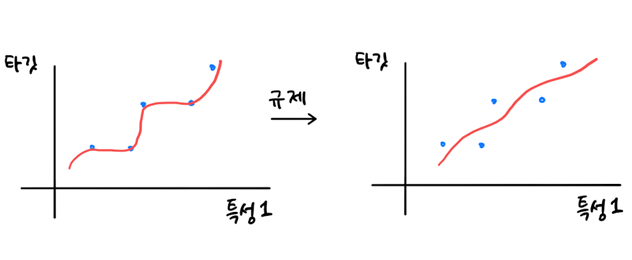

In [ ]:
#규제를 주기 전에 특성(Feature)의 scale을 맞추기. sklearn의 StandardScaler 활용 
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_poly) #훈련 

train_scaled = ss.transform(train_poly) #변환 #min-max, 평균-표준편차를 이용하여 스케일을 맞추었었음. 여기서는 StandardScaler API를 이용하여 간단히 처리할 수 있음 
test_scaled = ss.transform(test_poly)

In [ ]:
print(train_poly[:2])
print('-----')
print(train_scaled[:2])

[[1.96000000e+01 5.14000000e+00 3.04000000e+00 3.84160000e+02
  1.00744000e+02 5.95840000e+01 2.64196000e+01 1.56256000e+01
  9.24160000e+00 7.52953600e+03 1.97458240e+03 1.16784640e+03
  5.17824160e+02 3.06261760e+02 1.81135360e+02 1.35796744e+02
  8.03155840e+01 4.75018240e+01 2.80944640e+01 1.47578906e+05
  3.87018150e+04 2.28897894e+04 1.01493535e+04 6.00273050e+03
  3.55025306e+03 2.66161618e+03 1.57418545e+03 9.31035750e+02
  5.50651494e+02 6.97995264e+02 4.12822102e+02 2.44159375e+02
  1.44405545e+02 8.54071706e+01 2.89254655e+06 7.58555575e+05
  4.48639873e+05 1.98927329e+05 1.17653518e+05 6.95849599e+04
  5.21676772e+04 3.08540347e+04 1.82483007e+04 1.07927693e+04
  1.36807072e+04 8.09131319e+03 4.78552376e+03 2.83034868e+03
  1.67398054e+03 3.58769566e+03 2.12190560e+03 1.25497919e+03
  7.42244501e+02 4.38992857e+02 2.59637799e+02]
 [2.20000000e+01 5.88000000e+00 3.52000000e+00 4.84000000e+02
  1.29360000e+02 7.74400000e+01 3.45744000e+01 2.06976000e+01
  1.23904000e+01 1.064

#### 릿지 회귀
  - 계수를 제곱하는 방식 
  - 영향을 미치지 않는 특성에 계수를 제곱한 값을 곱하여 0에 가까운 가중치를 부여함 (계수가 소숫점일 경우 제곱하면 값이 커짐)

In [ ]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9896101671037343
0.9790693977615398


In [ ]:
#적절한 규제의 강도는?
#적절한 규제의 강도를 알 수 있는 방법은? 

import matplotlib.pyplot as plt 
train_score = []
test_score = []

#규제의 강도를 alpha 값이라고 함. alpha값이 크면 규제의 강도가 크고, 작으면 규제의 강도가 작음. 규제 강도가 크면 과소적합, 규제의 강도가 작으면 과대적합이 발생할 수 있음 
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

for alpha in alpha_list: 
  #릿지 모델 생성
  ridge = Ridge(alpha=alpha)
  #릿지 모델 훈련 
  ridge.fit(train_scaled, train_target)
  score1 = ridge.score(train_scaled, train_target)
  score2 = ridge.score(test_scaled, test_target)

  train_score.append(score1)
  test_score.append(score2)  

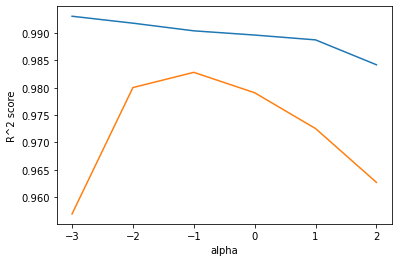

In [ ]:
#스코어 그래프 그리기 
# alpha의 값을 0.001 부터 10배씩 늘렸기 때문에 이대로 그래프를 그리면 그래프 왼쪽이 너무 촘촘해짐. 로그를 취하여 alpha 값의 간격을 동일하게 함 
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2 score')
plt.show()


In [ ]:
#적절한 알파값(규제의 강도)은 -1, 즉 0.1 임. 

ridge = Ridge(alpha=0.1)
ridge.fit (train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9903815817570366
0.9827976465386927


#### 라쏘 회귀 
 - 계수(기울기)의 절대값을 취하는 방식 
 - 특성값의 계수가 매우 낮으면 0으로 수렴하여, 특성 자체를 사용하지 않음 (계수가 소숫점일 때 절대값을 취하면 0이 됨)  

In [ ]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.9897898972080961
0.9800593698421883


### 4.실습문제 - 다중회귀(랏쏘 회귀) 실습

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 23364.075969939808, tolerance: 518.2793833333334
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20251.975097475122, tolerance: 518.2793833333334
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 806.2370926333242, tolerance: 518.2793833333334
  positive)


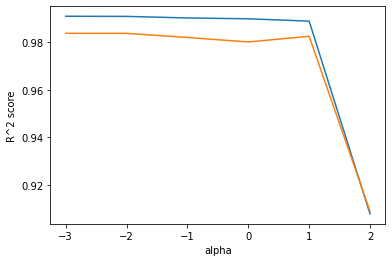

In [ ]:

#적절한 규제의 강도는?
#적절한 규제의 강도를 알 수 있는 방법은? 

train_score = []
test_score = []
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

for alpha in alpha_list: 
  lasso = Lasso(alpha = alpha)
  lasso.fit(train_scaled, train_target)
  score1 = lasso.score(train_scaled, train_target)
  score2 = lasso.score(test_scaled, test_target)
  train_score.append(score1)
  test_score.append(score2)

plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2 score')
plt.show()

In [ ]:
lasso = Lasso(alpha=10)
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.9888067471131867
0.9824470598706695
